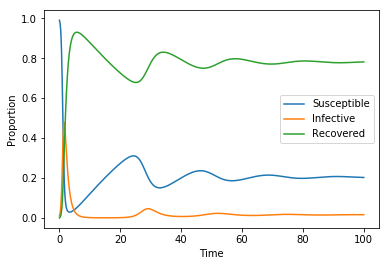

In [1]:
#!/usr/bin/env python
# This loads some packages that have arrays etc and the ODE integrators
import scipy, scipy.integrate


# Parameters
beta = 5
gamma = 1
mu = 1.0 / 50  # Warning!  int / int = int, e.g. 1 / 50 = 0.

# Initial condition
S0 = 0.99
I0 = 0.01
R0 = 0.00

Y0 = [ S0, I0, R0 ]

tMax = 100

# Time vector for solution
T = scipy.linspace(0, tMax, 1001)


# This defines a function that is the right-hand side of the ODEs
# Warning!  Whitespace at the begining of a line is significant!
def rhs(Y, t, beta, gamma, mu):
    '''
    SIR model.
    
    This function gives the right-hand sides of the ODEs.
    '''
    
    # Convert vector to meaningful component vectors
    # Note: Indices start with index 0, not 1!
    S = Y[0]
    I = Y[1]
    R = Y[2]
    
    N = S + I + R
    
    # The right-hand sides
    dS = mu * N - beta * I * S / N - mu * S
    dI = beta * I * S / N - (gamma + mu) * I
    dR = gamma * I - mu * R
    
    # Convert meaningful component vectors into a single vector
    dY = [ dS, dI, dR ]

    return dY


# Also, 'args' passes parameters to right-hand-side function.
solution = scipy.integrate.odeint(rhs,
                                  Y0,
                                  T,
                                  args = (beta, gamma, mu))
        
S = solution[:, 0]
I = solution[:, 1]
R = solution[:, 2]

N = S + I + R


# Make plots

# Load a plotting package
# PyLab is motivated by Matlab...
import pylab

# I usually use PyLab for quick plots
# and the Python GnuPlot package for publication

pylab.figure()

pylab.plot(T, S / N,
           T, I / N,
           T, R / N)

pylab.xlabel('Time')
pylab.ylabel('Proportion')

pylab.legend([ 'Susceptible', 'Infective', 'Recovered' ])

# Actually display the plot
pylab.show()